# Imports

In [1]:
import torch
from torch.optim import Adam
import torch.nn as nn

In [2]:
import torchvision
from torchvision.datasets import CIFAR10
from torchvision.transforms import transforms
from torch.utils.data import DataLoader

In [3]:
from network import Network
from utils import train, save_model, test_accuracy, test_batch, test_classes, image_show

# Variables

In [4]:
transformations = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [5]:
NUM_EPOCHS = 100
BATCH_SIZE = 16
NUMBER_OF_LABELS = 10

train_set = CIFAR10(root='./data', train=True, transform=transformations, download=True)
test_set = CIFAR10(root='./data', train=False, transform=transformations, download=True)

train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)
test_loader = DataLoader(test_set, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

classes = ['airplane', 'automibile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Files already downloaded and verified
Files already downloaded and verified


In [6]:
model = Network()

loss_fn = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001, weight_decay=0.0001)

# Visualization

In [7]:
viz_loader = DataLoader(train_set, batch_size=1, shuffle=False, num_workers=0)
im = next(iter(viz_loader))

In [8]:
im[1].item()

6

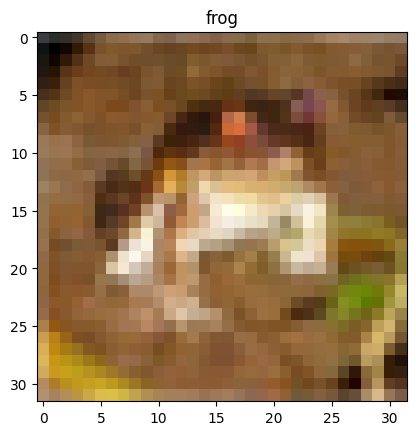

In [9]:
image_show(torchvision.utils.make_grid(im[0]), label=classes[im[1].item()])

# Training

In [10]:
train(model, train_loader, test_loader, NUM_EPOCHS, optimizer, loss_fn)

The model will be running on  cuda:0  device
[1,  1000] loss: 1.622
[1,  2000] loss: 1.263
[1,  3000] loss: 1.131
For epoch 1 the test accuracy over the whole test set is 62 %
[2,  1000] loss: 1.068
[2,  2000] loss: 0.972
[2,  3000] loss: 0.946
For epoch 2 the test accuracy over the whole test set is 67 %
[3,  1000] loss: 0.902
[3,  2000] loss: 0.856
[3,  3000] loss: 0.844
For epoch 3 the test accuracy over the whole test set is 68 %
[4,  1000] loss: 0.809
[4,  2000] loss: 0.774
[4,  3000] loss: 0.767
For epoch 4 the test accuracy over the whole test set is 67 %
[5,  1000] loss: 0.741
[5,  2000] loss: 0.716
[5,  3000] loss: 0.707
For epoch 5 the test accuracy over the whole test set is 67 %
[6,  1000] loss: 0.692
[6,  2000] loss: 0.662
[6,  3000] loss: 0.655
For epoch 6 the test accuracy over the whole test set is 67 %
[7,  1000] loss: 0.649
[7,  2000] loss: 0.616
[7,  3000] loss: 0.611
For epoch 7 the test accuracy over the whole test set is 67 %
[8,  1000] loss: 0.602
[8,  2000] loss

# Visualizing results

In [6]:
model = torch.load('model.pth')
model.eval()

Network(
  (conv1): Conv2d(3, 12, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(12, 12, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(12, 24, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(24, 24, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=2400, out_features=10, bias=True)
)

Real labels:   cat  ship  ship airplane  frog  frog automibile  frog   cat automibile airplane truck   dog horse truck  ship
Predicted:    cat  ship  ship  ship  frog  frog   dog  deer   cat truck airplane truck  deer horse truck  frog


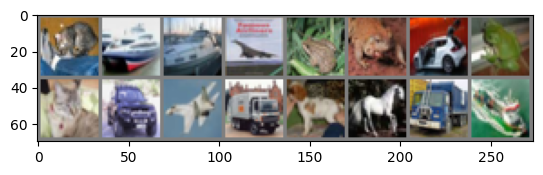

In [7]:
test_batch(model, test_loader, classes, BATCH_SIZE)

In [8]:
test_accuracy(model, test_loader)

68.6

In [7]:
test_classes(model, test_loader, NUMBER_OF_LABELS, BATCH_SIZE, classes)

Accuracy of airplane : 60 %
Accuracy of automibile : 74 %
Accuracy of  bird : 54 %
Accuracy of   cat : 53 %
Accuracy of  deer : 70 %
Accuracy of   dog : 42 %
Accuracy of  frog : 77 %
Accuracy of horse : 81 %
Accuracy of  ship : 90 %
Accuracy of truck : 81 %
